In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

glass = pd.read_csv('glass.csv')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [2]:
glass.Type.value_counts().sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: Type, dtype: int64

In [3]:
glass['household'] = glass.Type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.household.value_counts()

0    163
1     51
Name: household, dtype: int64

In [5]:
glass.sort_values( by = 'Al', inplace=True)
X= np.array(glass.Al).reshape(-1,1)
y = glass.household

In [6]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X,y)
pred = logreg.predict(X)
logreg.coef_, logreg.intercept_

(array([[3.11517927]]), array([-6.00934605]))

Text(0, 0.5, 'household')

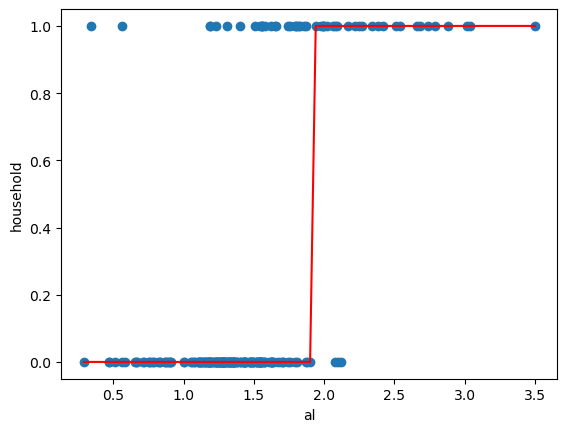

In [9]:
glass.sort_values( by = 'Al', inplace=True)
# Plot the class predictions.

plt.scatter(glass.Al, glass.household)
plt.plot(glass.Al, pred, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [10]:
logreg.predict_proba(X)[:15]

array([[0.9939759 , 0.0060241 ],
       [0.99296771, 0.00703229],
       [0.98949363, 0.01050637],
       [0.98949363, 0.01050637],
       [0.98811597, 0.01188403],
       [0.98614074, 0.01385926],
       [0.98614074, 0.01385926],
       [0.98526292, 0.01473708],
       [0.9817376 , 0.0182624 ],
       [0.98117062, 0.01882938],
       [0.98058638, 0.01941362],
       [0.97806663, 0.02193337],
       [0.97738831, 0.02261169],
       [0.9752281 , 0.0247719 ],
       [0.9752281 , 0.0247719 ]])

In [11]:
# Store the predicted probabilities of class 1.
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]

Text(0, 0.5, 'household')

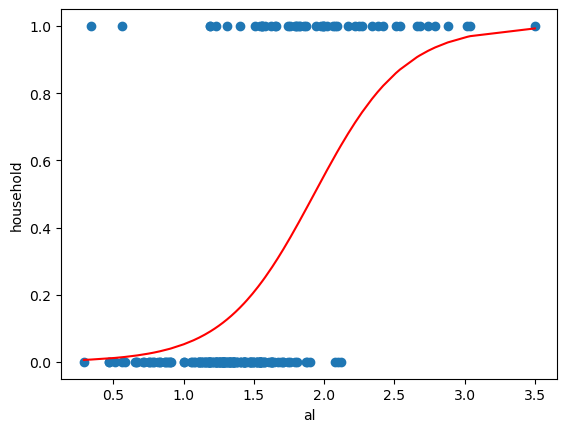

In [12]:
# Plot the predicted probabilities.
plt.scatter(glass.Al, glass.household)
plt.plot(glass.Al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [13]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_true=y, y_pred=pred)
cm

array([[160,   3],
       [ 25,  26]])

In [14]:
Accuracy = (cm[0,0]+ cm[1,1])/ (np.sum(cm))
Accuracy

0.8691588785046729

In [15]:
Precision = (cm[1,1])/ (np.sum(cm[: , 1]))
Precision

0.896551724137931

In [16]:
Recall = (cm[1,1])/ (np.sum(cm[1,:]))
Recall

0.5098039215686274

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy_score(y_true=y, y_pred=pred)

0.8691588785046729

In [18]:
precision_score(y_true=y, y_pred=pred)

0.896551724137931

In [19]:
recall_score(y,pred)

0.5098039215686274